### import packages

In [1652]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from collections import Counter
from copy import deepcopy

import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
 
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, \
    AdaBoostClassifier, GradientBoostingRegressor, GradientBoostingClassifier, \
    ExtraTreesClassifier
from sklearn.model_selection import train_test_split #to create validation data set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from pandas.tools.plotting import scatter_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, Imputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_curve, auc, mean_squared_error, make_scorer
from sklearn import preprocessing
#import statsmodels.api as sm
import statsmodels.formula.api as sm
#from sklearn.grid_search import GridSearchCV
from sklearn import model_selection
# from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE


# pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

In [1653]:
import scorecardpy as sc

#### Read in data

In [1654]:
# data dictionary - https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

df = pd.read_csv('germancredit.csv')

#### Data cleaning and exploratory data analysis

In [1655]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
status.of.existing.checking.account                         1000 non-null object
duration.in.month                                           1000 non-null int64
credit.history                                              1000 non-null object
purpose                                                     1000 non-null object
credit.amount                                               1000 non-null int64
savings.account.and.bonds                                   1000 non-null object
present.employment.since                                    1000 non-null object
installment.rate.in.percentage.of.disposable.income         1000 non-null int64
personal.status.and.sex                                     1000 non-null object
other.debtors.or.guarantors                                 1000 non-null object
present.residence.since                                     1000 non-null int64
propert

In [1656]:
df = df.rename(index=str, columns={"status.of.existing.checking.account": "checking_status", 
                              "duration.in.month": "duration",
                              "credit.history": "credit_history",
                              "credit.amount": "loan_amt",
                              "savings.account.and.bonds":"savings_status",
                              'present.employment.since':'emp_length',
                              'installment.rate.in.percentage.of.disposable.income':'rate_inc_perc',
                              'personal.status.and.sex':'gender_married',
                              'other.debtors.or.guarantors':'other_debtors',
                              'present.residence.since':'resid_length',
                              'property':'property_type',
                              'age.in.years':'age',
                              'other.installment.plans':'external_credit',
                              'number.of.existing.credits.at.this.bank':'internal_credit',
                              'job':'job_type',
                              'number.of.people.being.liable.to.provide.maintenance.for':'dependent_count',
                              'telephone':'has_phone',
                              'foreign.worker':'foreign_ind'
                             })

df['target'] = df['creditability'].map({'bad': 1, 'good': 0})
df['female'] = df['gender_married']
df['married'] = df['gender_married']
df = df.drop(['creditability', 'gender_married'], axis=1)

In [1657]:
cleanup_var = {"checking_status": {"... < 0 DM": 0, 
                                   '0 <= ... < 200 DM':100,
                                   "... >= 200 DM / salary assignments for at least 1 year": 200,
                                   'no checking account': None},
                "savings_status": {"... < 100 DM": 100, 
                                   "100 <= ... < 500 DM": 500, 
                                   "500 <= ... < 1000 DM": 1000, 
                                   "... >= 1000 DM": 1500,
                                   "unknown/ no savings account": None},
                "emp_length":     {"unemployed": 0, 
                                   "... < 1 year": 1, 
                                   "1 <= ... < 4 years": 4, 
                                   "4 <= ... < 7 years": 7,
                                   "... >= 7 years": 10 },              
                "credit_history": {"all credits at this bank paid back duly": 'current_bank', 
                                   "critical account/ other credits existing (not at this bank)": 'current_other', 
                                   "delay in paying off in the past": 'delinquent', 
                                   "existing credits paid back duly till now": 'existing_current',
                                   "no credits taken/ all credits paid back duly": 'no_credit' },
                "has_phone":      {"yes, registered under the customers name": 1, 
                                   "none": 0},
                "property_type":  {"building society savings agreement/ life insurance": 'agreement', 
                                   "car or other, not in attribute Savings account/bonds": 'car',
                                   'real estate':'real_estate',
                                   'unknown / no property':'no_property'},
                "job_type":       {"management/ self-employed/ highly qualified employee/ officer": 'management', 
                                   "skilled employee / official": 'skilled', 
                                   "unemployed/ unskilled - non-resident": 'unskilled_resid', 
                                   "unskilled - resident": 'unskilled_nonresid'},
                "foreign_ind":    {"yes": 1, 
                                   "no": 0},
                "female":         {"female : divorced/separated/married": 1, 
                                   "male : married/widowed": 0,
                                   'male : single':0},
                "married":        {"female : divorced/separated/married": 1, 
                                   "male : married/widowed": 1,
                                   'male : single':0},
              }

df.replace(cleanup_var, inplace=True) 
# df.head()

In [1658]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
checking_status    606 non-null float64
duration           1000 non-null int64
credit_history     1000 non-null object
purpose            1000 non-null object
loan_amt           1000 non-null int64
savings_status     817 non-null float64
emp_length         1000 non-null int64
rate_inc_perc      1000 non-null int64
other_debtors      1000 non-null object
resid_length       1000 non-null int64
property_type      1000 non-null object
age                1000 non-null int64
external_credit    1000 non-null object
housing            1000 non-null object
internal_credit    1000 non-null int64
job_type           1000 non-null object
dependent_count    1000 non-null int64
has_phone          1000 non-null int64
foreign_ind        1000 non-null int64
target             1000 non-null int64
female             1000 non-null int64
married            1000 non-null int64
dtypes: float64(2), int64(13), o

#### Missing data analysis

In [1659]:
print("Data Frame missing count")
pd.isnull(df).sum()

Data Frame missing count


checking_status    394
duration             0
credit_history       0
purpose              0
loan_amt             0
savings_status     183
emp_length           0
rate_inc_perc        0
other_debtors        0
resid_length         0
property_type        0
age                  0
external_credit      0
housing              0
internal_credit      0
job_type             0
dependent_count      0
has_phone            0
foreign_ind          0
target               0
female               0
married              0
dtype: int64

#### Summary statistics

In [1660]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
checking_status,606.000,65.182,65.999,0.000,0.000,100.000,100.000,200.000
duration,1000.000,20.903,12.059,4.000,12.000,18.000,24.000,72.000
loan_amt,1000.000,3271.258,2822.737,250.000,1365.500,2319.500,3972.250,18424.000
savings_status,817.000,302.081,396.409,100.000,100.000,100.000,500.000,1500.000
emp_length,1000.000,5.276,3.405,0.000,4.000,4.000,10.000,10.000
rate_inc_perc,1000.000,2.973,1.119,1.000,2.000,3.000,4.000,4.000
resid_length,1000.000,2.845,1.104,1.000,2.000,3.000,4.000,4.000
age,1000.000,35.546,11.375,19.000,27.000,33.000,42.000,75.000
internal_credit,1000.000,1.407,0.578,1.000,1.000,1.000,2.000,4.000
dependent_count,1000.000,1.155,0.362,1.000,1.000,1.000,1.000,2.000


In [1661]:
for var in ('checking_status', 'duration','credit_history', 'purpose', 'savings_status', 'emp_length', \
            'female', 'married', 'other_debtors', 'resid_length', 'property_type', 'external_credit',\
           'housing', 'internal_credit', 'job_type', 'has_phone', 'foreign_ind','target'):
    count = df[var].value_counts()
    percentage = df[var].value_counts(normalize=True)
    table = pd.concat([count, percentage], axis=1)
    print(table)

         checking_status  checking_status
0.000                274            0.452
100.000              269            0.444
200.000               63            0.104
    duration  duration
24       184     0.184
12       179     0.179
18       113     0.113
36        83     0.083
6         75     0.075
15        64     0.064
9         49     0.049
48        48     0.048
30        40     0.040
21        30     0.030
10        28     0.028
27        13     0.013
60        13     0.013
42        11     0.011
11         9     0.009
20         8     0.008
8          7     0.007
4          6     0.006
39         5     0.005
45         5     0.005
7          5     0.005
14         4     0.004
13         4     0.004
33         3     0.003
28         3     0.003
22         2     0.002
16         2     0.002
54         2     0.002
26         1     0.001
40         1     0.001
47         1     0.001
5          1     0.001
72         1     0.001
                  credit_history  credit_history
e

#### Split data into training and test datasets

In [1662]:
X = df.drop(['target'], axis=1)
y = df['target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1663]:
# see https://github.com/Sundar0989/WOE-and-IV/blob/master/WOE_IV.ipynb for WOE and IV calculation
# he got the order of dist_good and dist_bad reversed in WOE and IV

# define a binning function
def mono_bin(Y, X, max_bin, force_bin):
    n = max_bin
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": \
                           pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
        
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    print(d3)
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    d3 = d3.drop(d3[d3.COUNT == 0].index)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_NON_EVENT/d3.DIST_EVENT)
    d3["IV"] = (d3.DIST_NON_EVENT-d3.DIST_EVENT)*np.log(d3.DIST_NON_EVENT/d3.DIST_EVENT)
    d3["VAR_NAME"] = "VAR"

    d3['max_range'] = d3['MAX_VALUE']
    d3["min_range"] = d3.groupby('VAR_NAME')['MAX_VALUE'].shift(1)
    d3.loc[d3['min_range'].isnull(), 'min_range'] = -np.inf
    d3.loc[d3['MIN_VALUE'].isnull(), 'min_range'] = np.nan
    
    _max = d3.loc[d3['max_range'] != np.nan, 'max_range'].max()
    d3.loc[d3['max_range'] == _max, 'max_range'] = np.inf  

    d3['bucket'] = '(' + d3['min_range'].astype(str) + ', ' + d3['max_range'].astype(str) + ']'
    d3.loc[d3['bucket'] == '(nan, nan]', 'bucket'] = 'missing' 
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'min_range', 'max_range', 'COUNT', 'EVENT', 'EVENT_RATE', \
             'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT', 'bucket', 'WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    print(d3)
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    d3 = d3.drop(d3[d3.COUNT == 0].index)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_NON_EVENT/d3.DIST_EVENT)
    d3["IV"] = (d3.DIST_NON_EVENT-d3.DIST_EVENT)*np.log(d3.DIST_NON_EVENT/d3.DIST_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3['min_range'] = d3['MIN_VALUE']
    d3['max_range'] = d3['MAX_VALUE']
    d3['bucket'] = d3['MIN_VALUE']
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'min_range', 'max_range', 'COUNT', 'EVENT', 'EVENT_RATE', \
             'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT', 'bucket', 'WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)


def woe_graph(df, is_numeric):

    binx = df.copy()
    # binx = binx.loc[binx['VAR_NAME'] == 'property_type']
    total = binx['COUNT'].sum()
    binx['event_dist'] = binx['EVENT'] / total
    binx['non_event_dist'] = binx['NONEVENT'] / total
    binx['dist'] = binx['COUNT'] / total

    if is_numeric == True:
        binx['MIN_VALUE_STR'] = binx['MIN_VALUE'].astype(str)
        binx['MAX_VALUE_STR'] = binx['MAX_VALUE'].astype(str)
        binx['bin'] = binx[['MIN_VALUE_STR', 'MAX_VALUE_STR']].apply(lambda x: ','.join(x), axis=1)
    else:
        binx['bin'] = binx['MIN_VALUE']

    binx = binx.reset_index(drop=True)

    ## y_right_max and y_right_min
    y_right_max = np.ceil(binx['WOE'].max()*10)
    if y_right_max % 2 == 1: 
        y_right_max=y_right_max+1

    if y_right_max - binx['WOE'].max()*10 <= 0.3: 
        y_right_max = y_right_max+2

    y_right_max = y_right_max/10

    y_right_min = np.ceil(binx['WOE'].min()*10)
    if y_right_min % 2 == 1: 
        y_right_min=y_right_min-1

    if abs(y_right_min - binx['WOE'].min()*10) <= 0.3: 
        y_right_min = y_right_min-1

    y_right_min = y_right_min/10

    ## y_left_max
    y_left_max = np.ceil(binx['dist'].max()*10)/10
    if y_left_max>1 or y_left_max<=0 or y_left_max is np.nan or y_left_max is None: 
        y_left_max=1

    width = 0.35       # the width of the bars: can also be len(x) sequence
    ind = np.arange(len(binx.index))    # the x locations for the groups
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    p1 = ax1.bar(ind, binx['non_event_dist'], width, color=(24/254, 192/254, 196/254))
    p2 = ax1.bar(ind, binx['event_dist'], width, bottom=binx['non_event_dist'], color=(246/254, 115/254, 109/254))

    for i in ind:
        ax1.text(i, binx.loc[i,'dist']*1.06, str(round(binx.loc[i,'dist']*100,1))+'%, '+str(binx.loc[i,'COUNT']), ha='center')
    
    ax2.plot(ind, binx['WOE'], marker='o', color='blue')
        
    # settings
    ax1.set_ylabel('Bin count distribution')
    ax2.set_ylabel('Weight of evidence', color='blue')
    ax1.set_yticks(np.arange(0, y_left_max+0.2, 0.1))
    ax2.tick_params(axis='y', colors='blue')

    plt.xticks(ind, binx['bin'], rotation = 75)
    title_string = binx.loc[0,'VAR_NAME'] + "  (iv: " + str(round(binx.loc[0,'IV'],4)) + ")" 
    plt.title(title_string, loc='center')
    plt.legend((p2[0], p1[0]), ('bad', 'good'), loc='best')
    # show plot 
    plt.show()


def woe_analysis(df1, target, max_bin, force_bin):
    
    max_bin = max_bin
    force_bin = force_bin
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i], max_bin, force_bin)
                conv["VAR_NAME"] = i
                count = count + 1
                woe_graph(conv, True)
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                conv = conv.sort_values(by='WOE', ascending=False)
                woe_graph(conv, False)
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return iv_df, iv


def woe_conversion(df, woe):
    
    df_copy = df.copy()
    woe_df = woe.copy()

    var_list = list(df_copy)

    for i in range(0,len(var_list)):
        var_str = "'%s'" % var_list[i]
        var_woe = woe_df.loc[woe_df['VAR_NAME'] == var_list[i]].copy()

        var_woe['max_range'] = var_woe['MAX_VALUE']

        if np.issubdtype(df_copy[var_list[i]], np.number) and\
        (len(Series.unique(df_copy[var_list[i]])) > 2):
            var_woe['min_range'] = var_woe.groupby('VAR_NAME')['MAX_VALUE'].shift(1)
            var_woe.loc[var_woe['MIN_VALUE'].isnull(), 'min_range'].isnull()
            var_woe.loc[var_woe['min_range'].isnull(), 'min_range'] = var_woe['MIN_VALUE']
        else:
            var_woe['min_range'] = var_woe['MIN_VALUE']
 
        var_woe_clean = var_woe[var_woe['MIN_VALUE'].notnull()]
        var_woe_null = var_woe[var_woe['MIN_VALUE'].isnull()]

        if not var_woe_null.empty:
            woe_null = var_woe_null.iloc[0]['WOE']
        else:
            woe_null = np.nan

        min_value_list = var_woe_clean['min_range'].tolist()
        max_value_list = var_woe_clean['max_range'].tolist()
        choices = var_woe_clean['WOE'].tolist()

        cond_str_list = []

        N = len(min_value_list)
        
        for j in range(0,len(min_value_list)):  
            
                #condition for binary indicator variables
            if np.issubdtype(df_copy[var_list[i]], np.number) and \
            (len(Series.unique(df_copy[var_list[i]])) == 2) and \
            min_value_list[j] == max_value_list[j]: 
                com_str = "(df_copy[" + var_str + "] ==" + str(min_value_list[j]) + ")"
                
            elif np.issubdtype(df_copy[var_list[i]], np.number):
                if j == 0:
                    com_str = "(df_copy[" + var_str + "] <=" + str(max_value_list[j]) + ")"
                elif j == (N-1):
                    com_str = "(df_copy[" + var_str + "] >" + str(min_value_list[j]) + ")"
                else:
                    com_str = "(df_copy[" + var_str + "] >" + str(min_value_list[j]) + ") & (df_copy[" + var_str + "] <=" + str(max_value_list[j]) + ")"

            else:
                char_str = "'%s'" % min_value_list[j]
                com_str = "(df_copy[" + var_str + "] ==" + char_str + ")"
                
            cond_str_list.append(com_str)

        full_conds = ','.join(cond_str_list)

        conditions = eval(full_conds)
        var_woe_label = var_list[i] +'_woe'
        
        df_copy[var_woe_label] = np.select(conditions, choices, default =woe_null)
        df_copy = df_copy.drop([var_list[i]], axis=1)
    return df_copy


def scorecard(df, model, woe_iv_table, points0, odds0, pdo):

    points0=points0
    odds0=odds0 
    pdo=pdo
    
    #scored dataframe
    df_copy = df.copy(deep=True)
    n = len(df_copy.columns)
    # alpha = logreg_clf.intercept_
    if pdo > 0:
        factor = pdo/np.log(2)
    else:
        factor = -pdo/np.log(2)

    offset = points0 - b*np.log(odds0) #log(odds0/(1+odds0))

    coef_series = pd.Series(model.coef_[0], index=np.array(df_copy.columns)).loc[lambda x: x != 0]

    col_names = list(df_copy.columns)
    col_names_short = list([re.sub('_woe$', '', i) for i in df_copy.columns])

    sum_str_list = []

    for i in range(0, len(col_names)):
        coef = coef_series[i]
        col_name_score = (col_names_short[i] + '_score')
        
        df_copy[col_name_score] = -(df_copy[col_names[i]] * coef + (model.intercept_  / n )) * factor + (offset / n)
        df_copy = df_copy.drop([col_names[i]], axis=1)

        char_str = "'%s'" % col_name_score
        com_str = "df_copy[" + char_str + "]" 
        sum_str_list.append(com_str)

    full_conds = '+'.join(sum_str_list)

    df_copy['neutral'] = np.asscalar(-((model.intercept_ / n) * factor) + (offset / n))

    df_copy['total_score'] = eval(full_conds) 
    
    coef_df = coef_series.to_frame()
    coef_df.reset_index(level=0, inplace=True)
    coef_df['index'] = coef_df['index'].apply(lambda x: x.split('_woe')[0])
    coef_df.rename(columns={'index': 'variable', 0:'coef'}, inplace=True)

    woe_iv_table_copy = woe_iv_table.copy(deep=True)
    woe_iv_table_copy = woe_iv_table_copy[['VAR_NAME', 'bucket', 'WOE']]

    score_tab = pd.merge(woe_iv_table_copy, coef_df, how ='inner', left_on =['VAR_NAME'],  right_on = ['variable'])
    score_tab['score'] = -(score_tab['WOE'] * score_tab['coef'] + (model.intercept_ / n)) * factor + (offset / n)
    score_tab = score_tab.drop(['VAR_NAME'], axis=1)
    score_tab = score_tab[['variable', 'bucket', 'WOE', 'score']]

    return score_tab, df_copy


def adverse_action(scored_data):
    df_copy = scored_data.copy(deep=True)
    col_names = list(df_copy.columns)

    col_names = col_names[:len(col_names)-2]
    col_names_short = list([re.sub('_score$', '', i) for i in col_names])

    diff_var_list = []

    for i in range(0, len(col_names)):
        df_copy[col_names_short[i]] = df_copy[col_names[i]] - df_copy['neutral']
        diff_var_list.append(col_names_short[i])

    score = df_copy['total_score']
    df_copy = df_copy[diff_var_list]

    arr = np.argsort(df_copy.values, axis=1)
    reason = pd.DataFrame(df_copy.columns[arr], index=df_copy.index)

    reason1_4 = reason[[0, 1, 2, 3]]
    reason1_4 = reason1_4.rename(index=str, columns={0: 'reason_1', 1: 'reason_2', 2: 'reason_3', 3: 'reason_4'})
    reason_tab = pd.concat([reason1_4, score], axis=1)
    
    return reason_tab

#### Generate WOE and IV for variable selection, and select buckets for variables

                 MIN_VALUE  MAX_VALUE
Bucket                               
(-0.001, 100.0]      0.000    100.000
(100.0, 200.0]     200.000    200.000


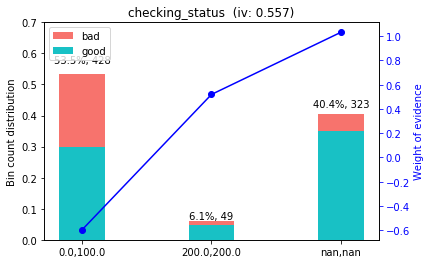

               MIN_VALUE  MAX_VALUE
Bucket                             
(3.999, 11.0]          4         11
(11.0, 12.0]          12         12
(12.0, 18.0]          13         18
(18.0, 24.0]          20         24
(24.0, 36.0]          26         36
(36.0, 60.0]          39         60


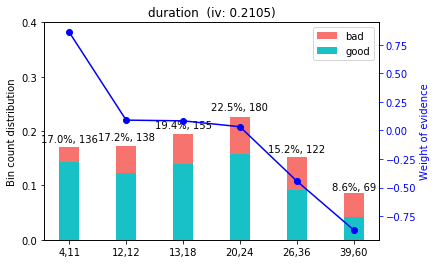

                  COUNT
X                      
current_bank         38
current_other       234
delinquent           73
existing_current    420
no_credit            35


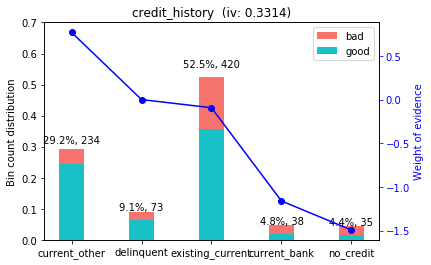

                     COUNT
X                         
business                79
car (new)              190
car (used)              84
domestic appliances     11
education               37
furniture/equipment    137
others                  10
radio/television       226
repairs                 19
retraining               7


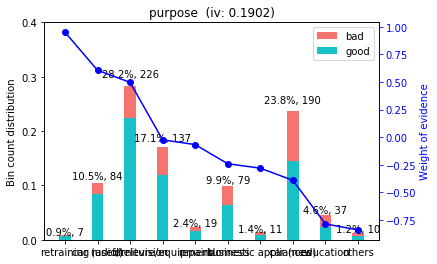

                   MIN_VALUE  MAX_VALUE
Bucket                                 
(249.999, 2333.0]        250       2333
(2333.0, 18424.0]       2337      18424


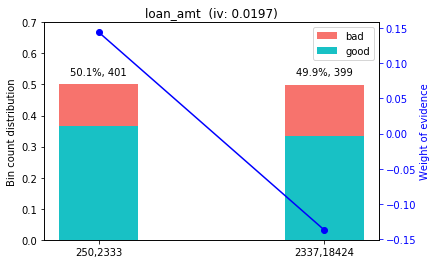

                 MIN_VALUE  MAX_VALUE
Bucket                               
(0.999, 50.0]          nan        nan
(50.0, 100.0]      100.000    100.000
(100.0, 1500.0]    500.000   1500.000


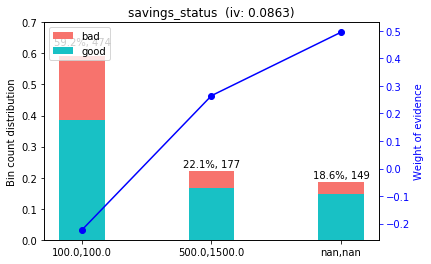

               MIN_VALUE  MAX_VALUE
Bucket                             
(-0.001, 4.0]          0          4
(4.0, 7.0]             7          7
(7.0, 10.0]           10         10


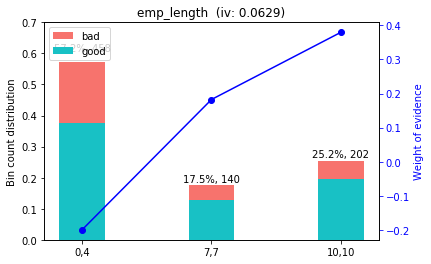

              MIN_VALUE  MAX_VALUE
Bucket                            
(0.999, 3.0]          1          3
(3.0, 4.0]            4          4


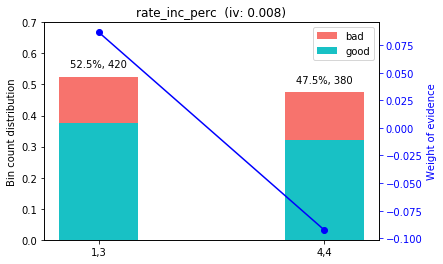

              COUNT
X                  
co-applicant     34
guarantor        46
none            720


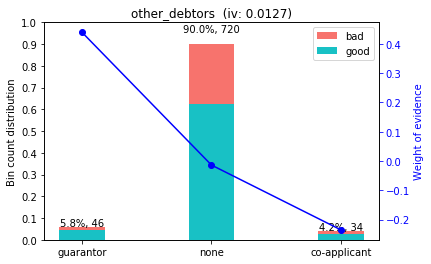

              MIN_VALUE  MAX_VALUE
Bucket                            
(0.999, 3.0]          1          3
(3.0, 4.0]            4          4


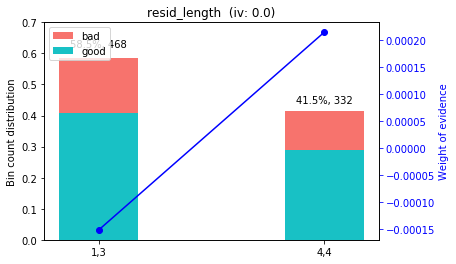

             COUNT
X                 
agreement      188
car            269
no_property    123
real_estate    220


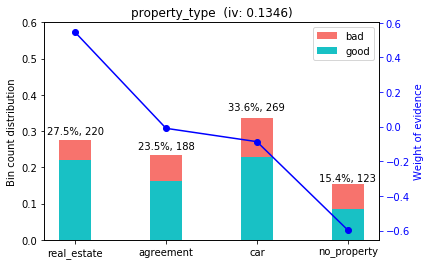

                MIN_VALUE  MAX_VALUE
Bucket                              
(18.999, 27.0]         19         27
(27.0, 33.0]           28         33
(33.0, 42.0]           34         42
(42.0, 75.0]           43         75


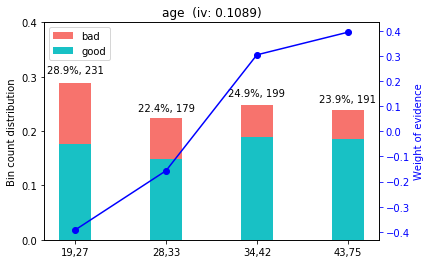

        COUNT
X            
bank      109
none      656
stores     35


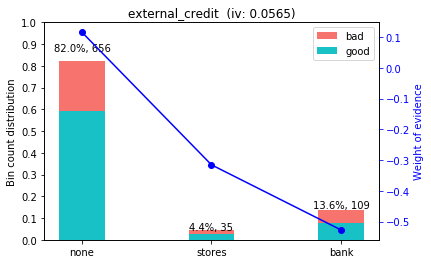

          COUNT
X              
for free     87
own         573
rent        140


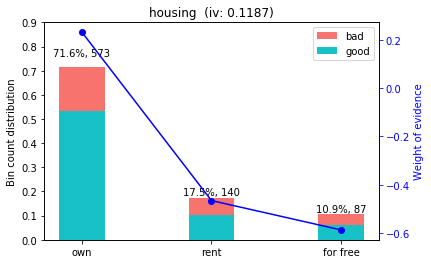

              MIN_VALUE  MAX_VALUE
Bucket                            
(0.499, 1.0]          1          1
(1.0, 4.0]            2          4


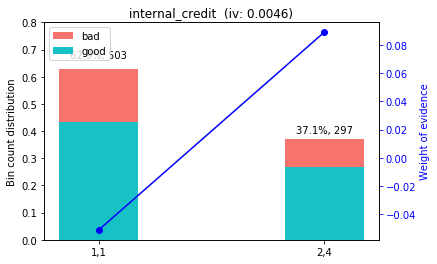

                    COUNT
X                        
management            128
skilled               505
unskilled_nonresid    150
unskilled_resid        17


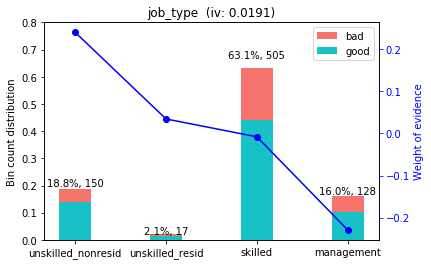

   COUNT
X       
1    685
2    115


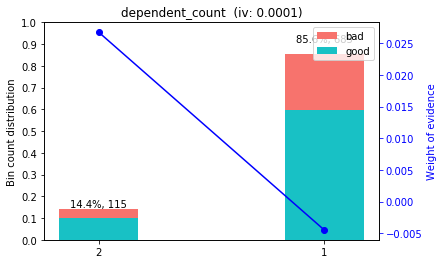

   COUNT
X       
0    464
1    336


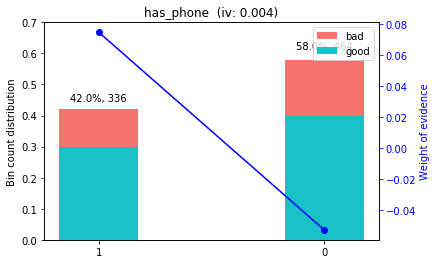

   COUNT
X       
0     28
1    772


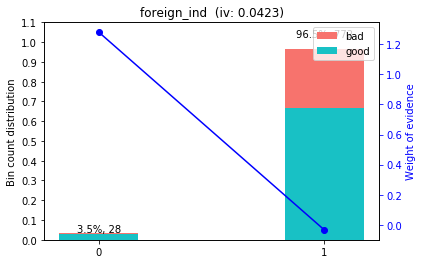

   COUNT
X       
0    512
1    288


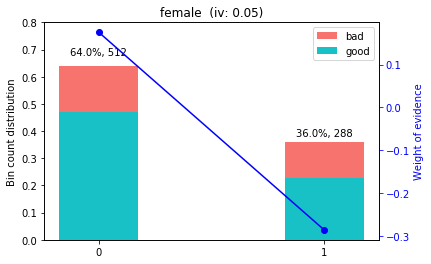

   COUNT
X       
0    440
1    360


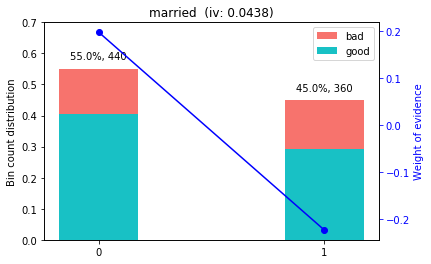

In [1664]:
final_iv, IV = woe_analysis(X_train, y_train, 20, 3)

In [1665]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,min_range,max_range,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,bucket,WOE,IV
0,checking_status,0.000,100.000,0.000,100.000,428,188.000,0.439,240.000,0.561,0.780,0.429,"(-inf, 100.0]",-0.597,0.557
1,checking_status,200.000,200.000,100.000,0.000,49,10.000,0.204,39.000,0.796,0.041,0.070,"(100.0, inf]",0.520,0.557
2,checking_status,NaN,NaN,NaN,NaN,323,43.000,0.133,280.000,0.867,0.178,0.501,missing,1.032,0.557
3,duration,4.000,11.000,0.000,11.000,136,21.000,0.154,115.000,0.846,0.087,0.206,"(-inf, 11.0]",0.859,0.210
4,duration,12.000,12.000,11.000,12.000,138,39.000,0.283,99.000,0.717,0.162,0.177,"(11.0, 12.0]",0.090,0.210
5,duration,13.000,18.000,12.000,18.000,155,44.000,0.284,111.000,0.716,0.183,0.199,"(12.0, 18.0]",0.084,0.210
6,duration,20.000,24.000,18.000,24.000,180,53.000,0.294,127.000,0.706,0.220,0.227,"(18.0, 24.0]",0.033,0.210
7,duration,26.000,36.000,24.000,36.000,122,49.000,0.402,73.000,0.598,0.203,0.131,"(24.0, 36.0]",-0.443,0.210
8,duration,39.000,60.000,36.000,0.000,69,35.000,0.507,34.000,0.493,0.145,0.061,"(36.0, inf]",-0.870,0.210
9,credit_history,current_other,current_other,current_other,current_other,234,39.000,0.167,195.000,0.833,0.162,0.349,current_other,0.768,0.331


In [1666]:
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

IV.sort_values('IV')

,VAR_NAME,IV
19,resid_length,0.000
3,dependent_count,0.000
9,has_phone,0.004
11,internal_credit,0.005
18,rate_inc_perc,0.008
15,other_debtors,0.013
12,job_type,0.019
13,loan_amt,0.020
8,foreign_ind,0.042
14,married,0.044


#### Drop variables where IV < 0.02, and illegal variables

In [1667]:
# X_vars = ['resid_length', 'dependent_count', 'has_phone', 'internal_credit', \
#                               'rate_inc_perc', 'other_debtors', 'job_type', 'loan_amt', 'foreign_ind',\
#                              'married', 'female', 'external_credit', 'emp_length', 'savings_status',
#                              'age']

X_vars = ['resid_length', 'dependent_count', 'has_phone', 'internal_credit', \
                              'rate_inc_perc', 'other_debtors', 'job_type', 'married', 'female', 'age']

X_train_clean = X_train.drop(X_vars,axis=1)

X_test_clean = X_test.drop(X_vars,axis=1)

#### Convert training data to WOE values

In [1668]:
X_train_woe = woe_conversion(X_train_clean, final_iv)
X_test_woe = woe_conversion(X_test_clean, final_iv)

#### Perform grid search for logistic regression hyperparameters

In [1669]:
kfold = StratifiedKFold(n_splits=10)

param_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                       'penalty': ['l1', 'l2']}
 
clf_logistic = GridSearchCV(estimator=LogisticRegression(random_state=1), param_grid=param_grid_logistic, cv= kfold)
clf_logistic.fit(X_train_woe, y_train)
 
logistic_final = clf_logistic.best_estimator_
print(clf_logistic.best_score_, clf_logistic.best_params_)
print(logistic_final)

0.75 {'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


#### Fit logistic regression model and calculate AUROC

In [1670]:
logreg_clf = LogisticRegression(penalty = 'l2', C=0.1)
logreg_clf.fit(X_train_woe, y_train)

pred_logreg_train = logreg_clf.predict(X_train_woe)
pred_logreg_test = logreg_clf.predict(X_test_woe)

acc_logreg_train = accuracy_score(y_train, pred_logreg_train)
fpr_train_logreg, tpr_train_logreg, thresholds = roc_curve(y_train, pred_logreg_train)
roc_auc_train_logreg = auc(fpr_train_logreg, tpr_train_logreg)

acc_logreg_test = accuracy_score(y_test, pred_logreg_test)
fpr_test_logreg, tpr_test_logreg, thresholds = roc_curve(y_test, pred_logreg_test)
roc_auc_test_logreg = auc(fpr_test_logreg, tpr_test_logreg)

print("Logistic Regression results")
print("Train set accuracy rate is: %f" % acc_logreg_train)
print("Test set accuracy rate is: %f" % acc_logreg_test)
print("Train set AUC rate is: %f" % roc_auc_train_logreg)
print("Test set AUC rate is: %f" % roc_auc_test_logreg)

Logistic Regression results
Train set accuracy rate is: 0.756250
Test set accuracy rate is: 0.765000
Train set AUC rate is: 0.649726
Test set AUC rate is: 0.646051


#### Generate credit score for all observations, and generate score table

In [1675]:
X_train_score_tab, X_train_scored = scorecard(X_train_woe, logreg_clf, final_iv, 600, 50, 20)
X_test_score_tab, X_test_scored = scorecard(X_test_woe, logreg_clf, final_iv, 600, 50, 20)

In [1677]:
X_train_scored

,checking_status_score,duration_score,credit_history_score,purpose_score,loan_amt_score,savings_status_score,emp_length_score,property_type_score,external_credit_score,housing_score,foreign_ind_score,neutral,total_score
29,34.022,31.245,46.241,41.556,46.789,43.525,50.362,39.951,47.267,48.937,45.976,46.250,475.869
535,56.891,46.811,59.135,30.962,45.683,43.525,44.084,45.339,47.267,40.856,45.976,46.250,506.528
695,67.388,61.061,44.671,58.010,45.683,49.484,44.084,46.153,47.267,40.856,45.976,46.250,550.632
557,67.388,46.811,21.223,38.641,46.789,52.298,44.084,46.153,41.626,48.937,45.976,46.250,499.926
836,67.388,47.805,44.671,55.880,45.683,52.298,44.084,45.339,47.267,48.937,45.976,46.250,545.329
596,34.022,46.811,44.671,38.641,45.683,43.525,48.225,45.339,47.267,40.856,45.976,46.250,481.016
165,67.388,61.061,44.671,45.762,46.789,49.484,44.084,45.339,47.267,48.937,45.976,46.250,546.757
918,34.022,46.811,44.671,45.762,46.789,49.484,44.084,46.153,47.267,48.937,45.976,46.250,499.955
495,34.022,46.811,44.671,45.762,46.789,52.298,44.084,45.339,47.267,48.937,45.976,46.250,501.956
824,67.388,47.698,59.135,45.762,46.789,43.525,44.084,45.339,47.267,48.937,45.976,46.250,541.900


In [1678]:
X_test_scored

,checking_status_score,duration_score,credit_history_score,purpose_score,loan_amt_score,savings_status_score,emp_length_score,property_type_score,external_credit_score,housing_score,foreign_ind_score,neutral,total_score
521,34.022,47.698,44.671,55.880,46.789,43.525,44.084,52.008,47.267,48.937,45.976,46.250,510.855
737,34.022,47.698,44.671,38.641,46.789,49.484,44.084,45.339,47.267,48.937,45.976,46.250,492.908
740,34.022,46.811,26.794,38.641,45.683,49.484,48.225,45.339,41.626,48.937,45.976,46.250,471.538
660,56.891,47.805,44.671,55.880,45.683,43.525,44.084,52.008,47.267,40.856,45.976,46.250,524.645
411,67.388,38.618,59.135,58.010,46.789,43.525,48.225,45.339,47.267,48.937,45.976,46.250,549.208
678,34.022,46.811,44.671,55.880,46.789,43.525,50.362,52.008,41.626,40.856,45.976,46.250,502.524
626,56.891,61.061,44.671,45.762,45.683,43.525,44.084,52.008,47.267,48.937,45.976,46.250,535.863
513,34.022,47.805,46.241,55.880,45.683,43.525,44.084,52.008,47.267,40.856,45.976,46.250,503.345
859,67.388,61.061,44.671,38.641,46.789,49.484,44.084,52.008,47.267,40.856,56.818,46.250,549.066
136,67.388,38.618,46.241,58.010,46.789,49.484,44.084,45.339,47.267,48.937,45.976,46.250,538.132


#### Generate adverse action codes for all borrowers

In [1672]:
reason_tab = adverse_action(X_train_scored)

In [1673]:
reason_tab

,reason_1,reason_2,reason_3,reason_4,total_score
29,duration,checking_status,property_type,purpose,475.869
535,purpose,housing,savings_status,emp_length,506.528
695,housing,emp_length,credit_history,loan_amt,550.632
557,credit_history,purpose,external_credit,emp_length,499.926
836,emp_length,credit_history,property_type,loan_amt,545.329
596,checking_status,purpose,housing,savings_status,481.016
165,emp_length,credit_history,property_type,purpose,546.757
918,checking_status,emp_length,credit_history,purpose,499.955
495,checking_status,emp_length,credit_history,property_type,501.956
824,savings_status,emp_length,property_type,purpose,541.900
